In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Read this First

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

### **Binary Images**

**For these exercises, please download the 'binary_objects.png' image and the 'binary_operations.png' image from the same GitHub folder. We will be doing some operations on them.**

**First, we'll see how we can change an image into a binary image.**

In [2]:
import cv2
original_image = cv2.imread('binary_objects.png')
grayscale = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray')

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


**Binary images by definition only have two pixel values, 255 or 0. Convert the grayscaled image into a binary image by setting all pixels greater than 125 in value to 255. Feel free to do it both using masking, or using cv2's threshold operation.**

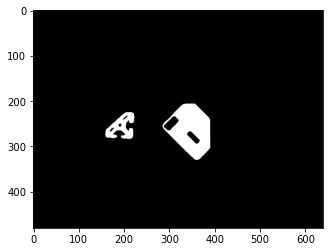

In [3]:
binary_image = grayscale
binary_image[binary_image>125] = 255
binary_image[binary_image<=125] = 0
plt.imshow(binary_image , cmap='gray')

**We now have some binary images, with pixels where the object is set to 255, and non-object pixels set to 0. Before we can do processing on each object individually, we have to separate them.**

**Use OpenCV's connectedComponents to separate out the different objects. Plot the image with a different pixel value for each object.**

3
0 250
(480, 640)


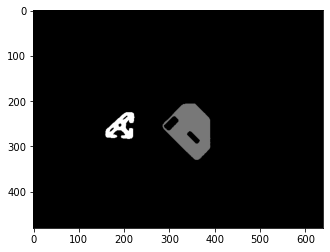

In [4]:
output = cv2.connectedComponents(binary_image, connectivity=4, ltype=cv2.CV_32S)

num_labels = output[0]
print(num_labels)

labels = output[1]
colors = [0,250]
print(colors[0],colors[1])
h, w = binary_image.shape
print(binary_image.shape)
image = np.zeros((h, w), dtype=np.int)
colors = [0,120,255]

image = np.zeros((h, w), dtype=np.uint8)
for i in range(h):
    for j in range(w):
        image[i, j] = colors[labels[i, j]]
        
plt.imshow(image , cmap='gray')

**Now that each object detected has a unique pixel value, separate the objects from each other in the image. That is, create an image where we only have the first object present, and create a second image where we only have the second object present. Plot them side by side.**

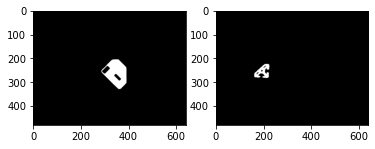

In [5]:
object1 =  np.zeros((h, w), dtype=np.uint8)
object1[image == colors[1] ] = colors[1]

object2 =  np.zeros((h, w), dtype=np.uint8)
object2[image == colors[2] ] = colors[2]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(object1 , cmap='gray')
plt.subplot(1,2,2)
plt.imshow(object2 , cmap='gray')

plt.show()


**Now, find the area of each of the objects in the image. You should be getting around 7691 for one object and 2064 for the other. Print out the results.**

In [6]:
area1 = np.sum(object1 == colors[1])
area2 = np.sum(object2 == colors[2])
print("area1 : ", area1)
print("area2 : ", area2)

area1 :  7691
area2 :  2064


**Another interesting we can do is to find the center of mass of the object itself. This is simply done by averaging the x and y coordinates of all of the pixels of that object. Compute the center of mass for the objects and print them.**

In [7]:
y,x = np.where(object1 ==colors[1])
center1_x = int(np.around( np.average(x) ))
center1_y = int(np.around( np.average(y) ))
print("object1 center of mass :",center1_x ,',',center1_y )

y,x = np.where(object2 ==colors[2])
#print(len(x))
center2_x = int(np.around( np.average(x) ))
center2_y = int(np.around( np.average(y) ))
print("object2 center of mass :",center2_x ,',',center2_y )

object1 center of mass : 349 , 264
object2 center of mass : 195 , 257


**Now, using cv2.circle(), plot the centers of the objects as a red circle (of a reasonable radius) onto the original coloured images, and verify that this visually makes sense.**

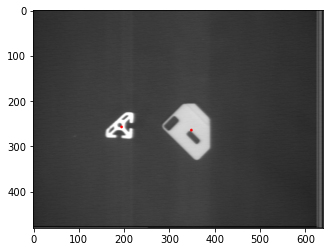

In [8]:
cv2.circle(original_image, (center1_x, center1_y), 3, (255,0,0),-1) # x,y,r,color
cv2.circle(original_image, (center2_x, center2_y), 3, (255,0,0),-1) # x,y,r,color
plt.imshow(original_image)

### **Binary Morphology**

**Now we'll do some simple exploration with binary morphological operations. First load the 'binary_operations.png' image.**

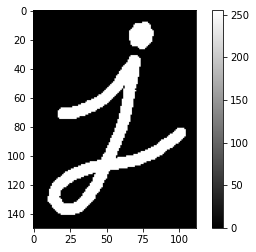

In [9]:
binary_image = cv2.imread('binary_operations.png', 0)
plt.imshow(binary_image, cmap='gray')
plt.colorbar()

**We'll first do some simple binary erosion. Create a 5x5 kernel of ones, with dtype=uint8. Then, using OpenCV's cv2.erode(), perform binary erosion with the binary image. Plot the results.**

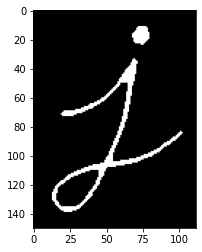

In [11]:
kernel = np.ones( (5 ,5) , dtype = np.uint8 )
erosion = cv2.erode(binary_image , kernel)
plt.imshow(erosion , cmap='gray')

**Now, using the same kernel, perform binary dilation on the original image, using cv2.dilate. Plot the results.**

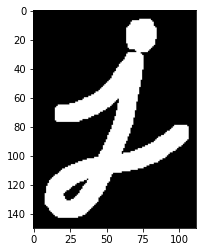

In [12]:
dilation = cv2.dilate(binary_image , kernel)
plt.imshow(dilation , cmap='gray')

**Subtract the eroded image from the dilated image, and then plot it.**

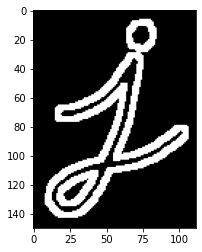

In [14]:
subtract = dilation - erosion
plt.imshow(subtract , cmap = "gray")

**Is this what you expected?**

It is.

**Now we want to see what happens when we do binary erosion and dilation in succession. Create a new image that is a copy of the original binary image, but with around 1% of the pixels randomly flipped.**

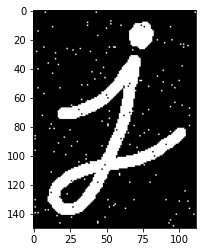

In [16]:
import random
new_image = binary_image.copy()

x,y = np.where(new_image >= 0)
numbers = range(0,len(x))
selected_pos = random.sample(numbers , int(len(x)*0.01) )
for i in range(0 , len(selected_pos) ):
    new_image[ x[ selected_pos[i] ] ,y[ selected_pos[i] ] ] = 255 - new_image[ x[ selected_pos[i] ] ,y[ selected_pos[i] ]]
plt.imshow(new_image , cmap = "gray")

**Now, using the same 5x5 kernel, perform binary erosion on the image with random pixels flipped. Plot the result.**

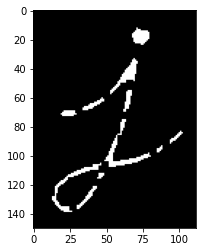

In [17]:
erosion = cv2.erode(new_image , kernel)
plt.imshow(erosion , cmap='gray')

**What do you notice? Is this what you expect?**

Some non-noise parts are also been erased.

**Now apply binary dilation to the eroded image above, and plot the result.**

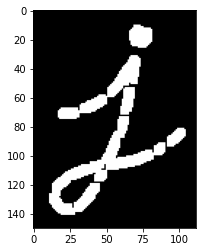

In [18]:
dilation = cv2.dilate(erosion , kernel)
plt.imshow(dilation , cmap='gray')

**This is binary opening, where we use erosion followed by dilation. Is this what you expected? When do we want to use binary opening?**

It is.
When we want to suppress the structures smaller than the structing elements, we want to use binary opening.

**Let's do the same thing, but now first with dilation then erosion. Here, perform binary dilation using the image with the pixels flipped and the same 5x5 kernel. Plot the results.**

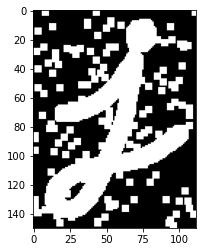

In [19]:
dilation = cv2.dilate(new_image , kernel)
plt.imshow(dilation , cmap='gray')

**What do you notice? Is this what you expected?**

some noise has been dilated as well, it is what I expected.

**Now apply binary erosion to the image above, and plot the results.**

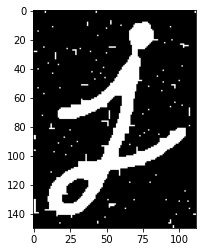

In [20]:
erosion = cv2.erode(dilation , kernel)
plt.imshow(erosion , cmap='gray')

**This is binary closing, where we use dilation followed by erosion. Is this what you expected? When do we want to use binary closing?**

It is what I expected, when we want to fill the holes smaller than the structing elements we want to use binary closing.